## Observations and Insights

## Dependencies and starter code

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "05-Matplotlib_homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results = "05-Matplotlib_homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
print(merge_table)



## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sorted_by_drug_regimen = merge_table.groupby(["Drug Regimen"])

means = sorted_by_drug_regimen['Tumor Volume (mm3)'].mean()
medians = sorted_by_drug_regimen['Tumor Volume (mm3)'].median()
variance = sorted_by_drug_regimen['Tumor Volume (mm3)'].var()
st_dev = sorted_by_drug_regimen['Tumor Volume (mm3)'].std()
sem = sorted_by_drug_regimen['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame([[means,medians,variance, st_dev, sem]],columns=['Mean','Median','Variance', 'Standard Deviation', 'Standard Error'])
print(summary_table)

                                                Mean  \
0  Drug Regimen
Capomulin    40.675741
Ceftamin  ...   

                                              Median  \
0  Drug Regimen
Capomulin    41.557809
Ceftamin  ...   

                                            Variance  \
0  Drug Regimen
Capomulin    24.947764
Ceftamin  ...   

                                  Standard Deviation  \
0  Drug Regimen
Capomulin    4.994774
Ceftamin   ...   

                                      Standard Error  
0  Drug Regimen
Capomulin    0.329346
Ceftamin   ...  


## Bar plots

AxesSubplot(0.125,0.125;0.775x0.755)


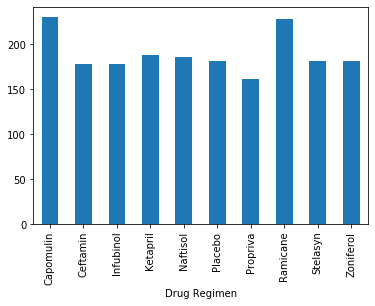

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points_count = sorted_by_drug_regimen["Mouse ID"].count()

print(data_points_count.plot(kind = 'bar'))


In [27]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x_axis_labels = merge_table["Drug Regimen"].unique()

x_axis = np.arange(len(x_axis_labels))
y_axis = sorted_by_drug_regimen["Mouse ID"].count()

plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")

tick_locations = [value for value in x_axis] 

plt.xticks(tick_locations, x_axis_labels)

#plt.xlim(-0.75, len(x_axis)-0.25) 
#plt.ylim(1500, max(y_axis)+100

SyntaxError: unexpected EOF while parsing (<ipython-input-27-d5be0e262d44>, line 14)

## Pie plots

AxesSubplot(0.260833,0.125;0.503333x0.755)


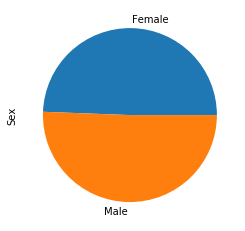

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sorted_by_sex = merge_table.groupby(["Sex"])

m_f_count = sorted_by_sex['Sex'].count()

print(m_f_count.plot(kind = 'pie'))

([<matplotlib.patches.Wedge object at 0x1a2029b860>, <matplotlib.patches.Wedge object at 0x1a202a9278>], [Text(-0.6908564105755949, -0.8559891471079557, 'Males'), Text(0.690856410575595, 0.8559891471079556, 'Females')], [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'), Text(0.3768307694048699, 0.46690317114979385, '49.4%')])


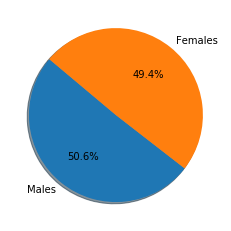

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = len(merge_table.loc[merge_table["Sex"] == "Male", :])
females = len(merge_table.loc[merge_table["Sex"] == "Female", :])

# Labels for the sections of the pie chart
labels = ["Males", "Females"]

# The values of each section of the pie chart
sexes = [males, females]

print(plt.pie(sexes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140))

## Quartiles, outliers and boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Find lowest average tumor volume per drug regimen
#print(sorted_by_drug_regimen.mean())

#Ramicane, Capomulin, Propiva, Ceftamin are the four with the lowest average tumor volume

ramicane_df = (merge_table.loc[merge_table["Drug Regimen"] == "Ramicane", :])
capomulin_df = (merge_table.loc[merge_table["Drug Regimen"] == "Capomulin", :])
propiva_df = (merge_table.loc[merge_table["Drug Regimen"] == "Propiva", :])
ceftamin_df = (merge_table.loc[merge_table["Drug Regimen"] == "Ceftamin", :])

new_ramicane = ramicane_df.loc[ramicane_df["Timepoint"] == 0]
print(new_ramicane[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]])

#df.loc[df.set_of_numbers > 4, 'equal_or_lower_than_4?'] = 'False'
#If statement?


    Mouse ID  Timepoint  Tumor Volume (mm3)
0       k403          0                45.0
40      g791          0                45.0
50      s508          0                45.0
65      m546          0                45.0
75      z578          0                45.0
85      j913          0                45.0
105     n364          0                45.0
145     c758          0                45.0
165     a644          0                45.0
175     i177          0                45.0
185     j989          0                45.0
205     a520          0                45.0
225     r811          0                45.0
245     i334          0                45.0
255     q610          0                45.0
263     d251          0                45.0
283     c458          0                45.0
318     a411          0                45.0
391     e662          0                45.0
401     u196          0                45.0
411     q597          0                45.0
421     a444          0         

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen